# PROBLEM 1

In [1]:
import time
import math 
import numpy

# import all other necessary libraries that you require

In [2]:
#define a function to get the nth position prime number

#Optimised Sieve of Eratosthenes algorithm for speed and memory.
#Logic of Sieve of Eratosthenes is to alloting all numbers as prime then removing their multiples 
#Time complexity : O(n*log(log(n))) 
def Sieve_Eratosthenes(n):
     #Input n>=6, Returns a array of primes, 2 <= p < n
    sieve = numpy.ones(n//3 + (n%6==2), dtype=numpy.bool)
    for i in range(1,int(n**0.5)//3+1):
        if sieve[i]:
            k=3*i+1|1
            sieve[k*k//3 :: 2*k] = False
            sieve[k*(k-2*(i&1)+4)//3::2*k] = False
    return numpy.r_[2,3,((3*numpy.nonzero(sieve)[0][1:]+1)|1)]


def nth_prime(n):
    #upto gets the limit where our prime numbers till n is covered
    upto = max(100, n * math.log(n))
    primes = []
    while len(primes) < n:
        primes = Sieve_Eratosthenes(int(upto))
        #Sieve_Eratosthenes is the fastest algorithm to get number of prime till n
        upto *= 1.5
        #if upto doesn't have the count till n then while loop runs again
        #and add length to upto according to the memory
    return primes[n-1]

In [3]:

start1 = time.time()

# your code goes here
a=nth_prime(10001)


end1 = time.time()
start2 = time.time()

# your code goes here

b=nth_prime(1000001)

end2 = time.time()

In [4]:
time1 = end1 - start1
time2 = end2 - start2

print('The 10001th prime number is {}'.format(a))
print(f'Time taken for implentation = {time1}')
print('The 1000001th prime number is {}'.format(b))
print(f'Time taken for implentation = {time2}')


The 10001th prime number is 104743
Time taken for implentation = 0.0022301673889160156
The 1000001th prime number is 15485867
Time taken for implentation = 0.10389304161071777


# PROBLEM 2

In [5]:
##import all the necesary library
import numpy as np
import cv2 
#using matplotlib as mention in queries doc
import matplotlib.pyplot as plt



In [6]:
## Read the image


img = cv2.imread('/Users/jaineel/Downloads/WhatsApp Image 2020-06-20 at 7.01.20 PM.jpeg', cv2.IMREAD_COLOR) 

# Convert to grayscale. 
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
  
# Blur using 3 * 3 kernel. 
gray_blurred = cv2.blur(gray, (3, 3)) 
  
# Apply Hough transform on the blurred image. 
detected_circles = cv2.HoughCircles(gray_blurred,  
                   cv2.HOUGH_GRADIENT, 1, 20, param1 = 50, 
               param2 = 30, minRadius = 1, maxRadius = 40) 



The center coordinate is (50, 26)


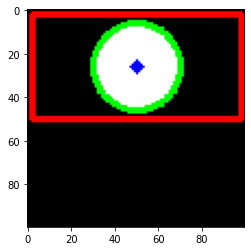

In [7]:
##Find the Bounding box 
start_point = (2, 2) 
  
# Ending coordinate, here (220, 220) 
# represents the bottom right corner of rectangle 
end_point = (98, 50) 
  
# Blue color in BGR 
color = (255, 0, 0) 
  
# Line thickness of 2 px 
thickness = 2

  
# Draw circles that are detected. 
if detected_circles is not None: 
  
    # Convert the circle parameters a, b and r to integers. 
    detected_circles = np.uint16(np.around(detected_circles)) 
  
    for pt in detected_circles[0, :]: 
        a, b, r = pt[0], pt[1], pt[2] 
  
        # Draw the circumference of the circle. 
        cv2.circle(img, (a, b), r, (0, 255, 0), 2) 
      
        # Draw a small circle (of radius 1) to show the center. 
        cv2.circle(img, (a, b), 1, (0, 0, 255), 3)
        # Using cv2.rectangle() method 
        # Draw a rectangle with blue line borders of thickness of 2 px 
        cv2.rectangle(img, start_point, end_point, color, thickness)
        
        #print (gray.shape)
        plt.imshow(img)
        plt.imshow(img, cmap='gray')
        print('The center coordinate is',(a,b))

        #cv2.imshow("Detected Circle", img) 
        #cv2.waitKey(0) 





In [8]:
##Find the center of the bounding box
